<a href="https://colab.research.google.com/github/aadityas42/Manas/blob/main/task_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use('./deeplearning.mplstyle')

In [26]:
df_test= pd.read_csv('train.csv')
m = len(df_test)
print(f"Number of training examples is: {m}")

Number of training examples is: 283085


In [27]:
for col in df_test.columns:
  if df_test[col].isnull().any():
    if pd.api.types.is_numeric_dtype(df_test[col]):
      median_val=df_test[col].median()
      df_test.fillna({col: median_val}, inplace=True)
    else:
      pass

In [28]:
numeric_cols = df_test.select_dtypes(include=np.number).columns.tolist()
feature_cols = [col for col in numeric_cols if col != 'close']

x_train = df_test[feature_cols].values
y_train = df_test['close'].values

print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of x_train: (283085, 16)
Shape of y_train: (283085,)


In [29]:
# Add a column of ones to x_train for the bias term
X_b = np.c_[np.ones((x_train.shape[0], 1)), x_train]

# Calculate weights and bias using the normal equation
theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y_train

# Extract bias and weights
b = theta[0]
w = theta[1:]

print("Bias (b):", b)
print("Weights (w):", w)

Bias (b): 36.889901155455
Weights (w): [ 3.51479612e-01  2.24577818e-01 -1.58412906e-01  1.39473659e-02
  5.85057663e-03  7.09311487e-07 -1.63283597e-01  3.47087278e-03
  9.95730898e-03  1.65931803e-02  3.15465322e-01  4.39123670e-05
 -2.04071759e-01  4.05332357e-03 -9.66476004e-09  4.44989516e-03]


In [32]:
from sklearn.metrics import mean_squared_error

# Calculating MSE to measure model performance
mse = mean_squared_error(y_train, y_pred)

print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 139.9715955583591


In [34]:
from sklearn.metrics import r2_score

# Calculate R-squared score
r2 = r2_score(y_train, y_pred)

print(f"R-squared (R2) Score: {r2}")

R-squared (R2) Score: 0.9750447669793276


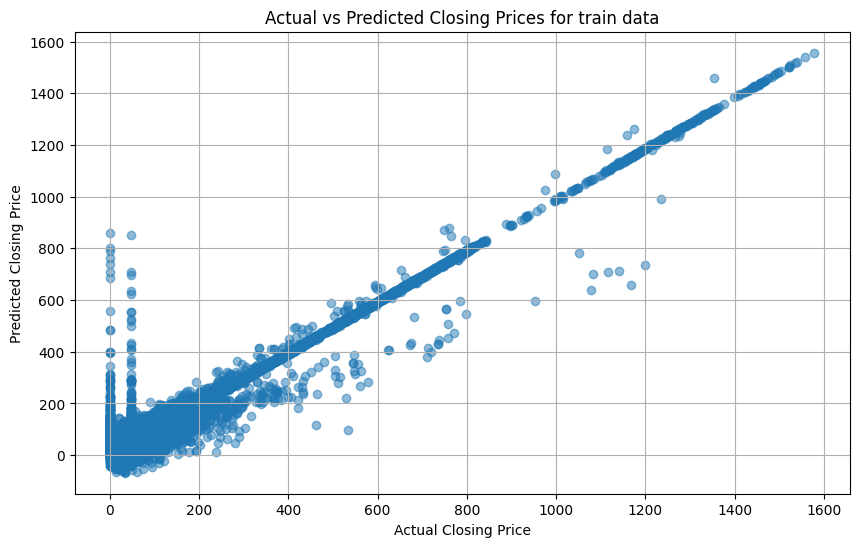

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Closing Prices for train data')
plt.xlabel('Actual Closing Price')
plt.ylabel('Predicted Closing Price')
plt.grid(True)
plt.show()

In [55]:
# Making predictions using the calculated weights and bias
y_pred = x_train @ w + b

# Display the first 5 predictions
print("First 5 predictions on train data:", y_pred[:5])

First 5 predictions on train data: [95.93587412 28.43821793 26.30526545 23.78014185 65.71180063]


In [48]:
df_test_data = pd.read_csv('test.csv')

In [50]:
for col in df_test_data.columns:
  if df_test_data[col].isnull().any():
    if pd.api.types.is_numeric_dtype(df_test_data[col]):
      median_val=df_test_data[col].median()
      df_test_data.fillna({col: median_val}, inplace=True)
    else:
      pass

In [78]:
import pandas as pd
import numpy as np

# Define the feature columns based on numeric columns in test data, except for 'close'
numeric_cols_test = df_test_data.select_dtypes(include=np.number).columns.tolist()
feature_cols_test = [col for col in numeric_cols_test if col != 'close']

# Extract the 'close' column into y_test before reordering
if 'close' in df_test_data.columns:
    y_test = df_test_data['close'].values
else:
    y_test = np.array([])
    print("Warning: 'close' column not found in test data. Cannot evaluate performance.")

numeric_feature_cols = [col for col in feature_cols if col in numeric_cols_test]
df_test_data_numeric = df_test_data[numeric_feature_cols]

# Extract feature values into x_test
x_test = df_test_data_numeric.values

print("Column reordering and error fix attempt complete.")
print(f"\nShape of X_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")
print("\nFinal X_test Columns (in correct order):")
print(df_test_data_numeric.columns.tolist())

Column reordering and error fix attempt complete.

Shape of X_test: (177063, 16)
Shape of y_test: (0,)

Final X_test Columns (in correct order):
['high', 'low', 'momentum_index', 'beta_indicator', 'risk_premium', 'index', 'volatility_factor', 'technical_score', 'oscillator_value', 'liquidity_ratio', 'open', 'quant_index', 'trend_strength', 'market_sentiment', 'volume', 'alpha_signal']


In [79]:
# Making predictions using the calculated weights and bias
y_pred_test = x_test @ w + b

# Displaying the shape of the prediction array
print("Shape of predictions on test data:", y_pred_test.shape)

Shape of predictions on test data: (177063,)
